In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_pickle('review_all.pkl')
df_all = pd.read_pickle('attraction.pkl')

# Data Visualization

## Rating

Text(0.5,0,u'Rating')

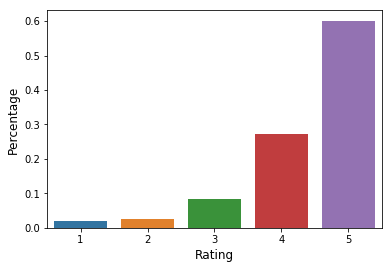

In [2]:
def getnum(s):
    return int(filter(lambda x: x.isdigit(),s))
df['rating'] = df.user_rating.apply(lambda x: getnum(x)/10)
ra = df.rating.value_counts()
sns.barplot(ra.index,ra/ra.sum())
plt.ylabel('Percentage',fontsize=12)
plt.xlabel('Rating',fontsize=12)

## Most Popular Tourist Attractions

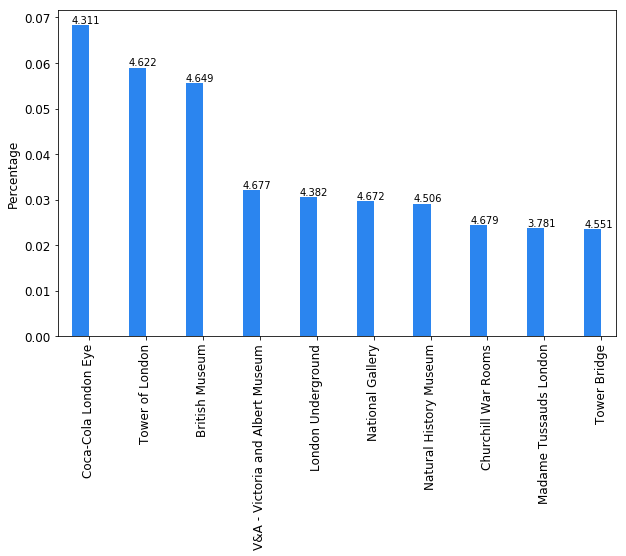

In [3]:
top10 = df.attraction.value_counts()[:10]/df.shape[0]
top10r = pd.DataFrame(top10).join(df.groupby(['attraction'])['rating'].mean())
plt.figure(figsize=(10,6))
ax1 = top10.plot(kind='bar',color='#2B85EF',width=.3,position=1,fontsize=12)
for i,p in enumerate(ax1.patches):
    ax1.annotate(str(round(top10r.rating[i],3)),(p.get_x(), p.get_height()+0.0005), color='k')
plt.ylabel('Percentage',fontsize=12)
plt.show()

## User Location

In [4]:
df.user_location.value_counts().head(10)

missing                           96199
London, United Kingdom            71675
London                             9219
Melbourne, Australia               4233
Sydney, Australia                  4206
New York City, New York            3533
Manchester, United Kingdom         3378
Greater London, United Kingdom     3299
Toronto, Canada                    2836
Birmingham, United Kingdom         2624
Name: user_location, dtype: int64

In [5]:
#============================================================================================================
# Convert user location to United States, United Kingdom, Australia, Canada, and other countries
#============================================================================================================
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming","AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY",'United States','us','usa','u.s.','New York City', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia',
       'Phoenix', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'San Francisco', 'Indianapolis',
       'Columbus', 'Fort Worth', 'Charlotte', 'Seattle', 'Denver',
       'El Paso', 'Detroit', 'Washington', 'Boston', 'Memphis',
       'Nashville', 'Portland, Ore.', 'Oklahoma City', 'Las Vegas',
       'Baltimore', 'Louisville', 'Milwaukee', 'Albuquerque', 'Tucson',
       'Fresno', 'Sacramento', 'Kansas City', 'Long Beach', 'Mesa',
       'Atlanta', 'Colorado Springs', 'Virginia Beach', 'Raleigh', 'Omaha',
       'Miami', 'Oakland', 'Minneapolis', 'Tulsa', 'Wichita',
       'New Orleans', 'Arlington']

states = map(lambda x: x.lower(), states)
def isusa(s):
    if s.lower() in states:
        return 'USA'
    else:
        return s
uk = ['Bedfordshire', 'Buckinghamshire', 'Cambridgeshire', 'Cheshire',
       'Cleveland', 'Cornwall', 'Cumbria', 'Derbyshire', 'Devon', 'Dorset',
       'Durham', 'East Sussex', 'Essex', 'Gloucestershire',
       'Greater London', 'Greater Manchester', 'Hampshire',
       'Hertfordshire', 'Kent', 'Lancashire', 'Leicestershire',
       'Lincolnshire', 'Merseyside', 'Norfolk', 'North Yorkshire',
       'Northamptonshire', 'Northumberland', 'Nottinghamshire',
       'Oxfordshire', 'Shropshire', 'Somerset', 'South Yorkshire',
       'Staffordshire', 'Suffolk', 'Surrey', 'Tyne and Wear',
       'Warwickshire', 'West Berkshire', 'West Midlands', 'West Sussex',
       'West Yorkshire', 'Wiltshire', 'Worcestershire', 'Flintshire',
       'Glamorgan', 'Merionethshire', 'Monmouthshire', 'Montgomeryshire',
       'Pembrokeshire', 'Radnorshire', 'Anglesey', 'Breconshire',
       'Caernarvonshire', 'Cardiganshire', 'Carmarthenshire',
       'Denbighshire', 'Aberdeen City', 'Aberdeenshire', 'Angus',
       'Argyll and Bute', 'City of Edinburgh', 'Clackmannanshire',
       'Dumfries and Galloway', 'Dundee City', 'East Ayrshire',
       'East Dunbartonshire', 'East Lothian', 'East Renfrewshire',
       'Eilean Siar', 'Falkirk', 'Fife', 'Glasgow City', 'Highland',
       'Inverclyde', 'Midlothian', 'Moray', 'North Ayrshire',
       'North Lanarkshire', 'Orkney Islands', 'Perth and Kinross',
       'Renfrewshire', 'Scottish Borders', 'Shetland Islands',
       'South Ayrshire', 'South Lanarkshire', 'Stirling',
       'West Dunbartonshire', 'West Lothian', 'Antrim', 'Armagh', 'Down',
       'Fermanagh', 'Derry and Londonderry', 'Tyrone', 'Oxford', 'Yorkshire', 'United Kingdom', 'uk', 'u.k.', 'england','London', 'Birmingham', 'Leeds', 'Glasgow', 'Sheffield', 'Bradford',
       'Liverpool', 'Edinburgh', 'Manchester', 'Bristol', 'Kirklees',
       'Fife', 'Wirral', 'North Lanarkshire', 'Wakefield', 'Cardiff',
       'Dudley', 'Wigan', 'East Riding', 'South Lanarkshire', 'Coventry',
       'Belfast', 'Leicester', 'Sunderland', 'Sandwell', 'Doncaster',
       'Stockport', 'Sefton', 'Nottingham']

uk = map(lambda x: x.lower(), uk)
def isuk(s):
    if s.lower() in uk:
        return 'UK'
    else:
        return s
    
def lastloc(a):
    return a.split(', ')[-1]

def isother(s):
    if s.lower() not in ['uk','usa','missing','australia','canada']:
        return 'Other'
    else:
        return s
    
df['loca'] = df.user_location.apply(lastloc)
df['country'] = df.loca.apply(lambda x: x.lower())
df['country'] = df.country.apply(isusa)
df['country'] = df.country.apply(isuk)
df['country'] = df.country.apply(isother)
df.country.value_counts()

UK           275502
Other        133674
missing       96199
USA           95626
australia     22691
canada        15073
Name: country, dtype: int64

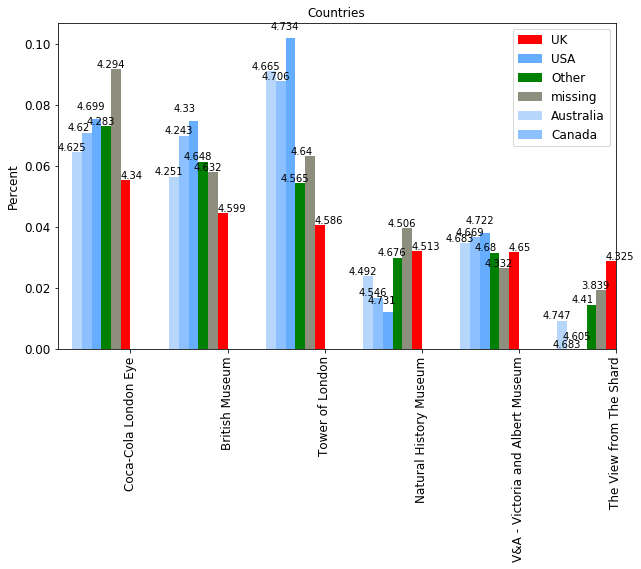

In [7]:
uk = df.loc[df.country == 'UK']
us = df.loc[df.country == 'USA']
ot = df.loc[df.country == 'Other']
mi = df.loc[df.country == 'missing']
au = df.loc[df.country == 'australia']
ca = df.loc[df.country == 'canada']
# Average rating of top attractions in each country group
us1 = pd.DataFrame(us.attraction.value_counts()[:30]/us.shape[0]).join(us.groupby(['attraction'])['rating'].mean())
uk1 = pd.DataFrame(uk.attraction.value_counts()[:6]/uk.shape[0]).join(uk.groupby(['attraction'])['rating'].mean())
ot1 = pd.DataFrame(ot.attraction.value_counts()[:30]/ot.shape[0]).join(ot.groupby(['attraction'])['rating'].mean())
au1 = pd.DataFrame(au.attraction.value_counts()[:30]/au.shape[0]).join(au.groupby(['attraction'])['rating'].mean())
ca1 = pd.DataFrame(ca.attraction.value_counts()[:30]/ca.shape[0]).join(ca.groupby(['attraction'])['rating'].mean())
mi1 = pd.DataFrame(mi.attraction.value_counts()[:30]/mi.shape[0]).join(mi.groupby(['attraction'])['rating'].mean())

plt.figure(figsize=(10,6))
ax = uk1.attraction.plot(kind='bar',color='r',width=.1,position=1,fontsize=12)
for i,p in enumerate(ax.patches):
    ax.annotate(str(round(uk1.rating[i],3)),(p.get_x(), p.get_height()+0.0005))
    
ax = us1.reindex(uk1.index).attraction.plot(kind='bar',color='#66ADFF',width=.1,position=4)
for i,p in enumerate(ax.patches[6:]):
    ax.annotate(str(round(us1.rating[i],3)),(p.get_x()-.152, p.get_height()+0.003))

ax = ot1.reindex(uk1.index).attraction.plot(kind='bar',color='g',width=.1,position=3)
for i,p in enumerate(ax.patches[12:]):
    ax.annotate(str(round(ot1.rating[i],3)),(p.get_x()-.152, p.get_height()+0.0005))
    
ax = mi1.reindex(uk1.index).attraction.plot(kind='bar',color='#8E8E7F',width=.1,position=2)
for i,p in enumerate(ax.patches[18:]):
    ax.annotate(str(round(mi1.rating[i],3)),(p.get_x()-.152, p.get_height()+0.0005))
    
ax = au1.reindex(uk1.index).attraction.plot(kind='bar',color='#B6D6FC',width=.1,position=6)
for i,p in enumerate(ax.patches[24:]):
    ax.annotate(str(round(au1.rating[i],3)),(p.get_x()-.152, p.get_height()+0.0005))
    
ax = ca1.reindex(uk1.index).attraction.plot(kind='bar',color='#8CC0FE',width=.1,position=5)
for i,p in enumerate(ax.patches[30:]):
    ax.annotate(str(round(ca1.rating[i],3)),(p.get_x()-.152, p.get_height()+0.0005))
    
    
plt.legend(['UK','USA','Other','missing','Australia','Canada'],fontsize=12)
plt.ylabel('Percent',fontsize=12)
plt.title('Countries',fontsize=12)
plt.show()

## Mobile users

In [7]:
df.viamobile.value_counts()

no             468387
via mobile     170378
Name: viamobile, dtype: int64

Text(0.5,1,u'Mobile / Not Mobile')

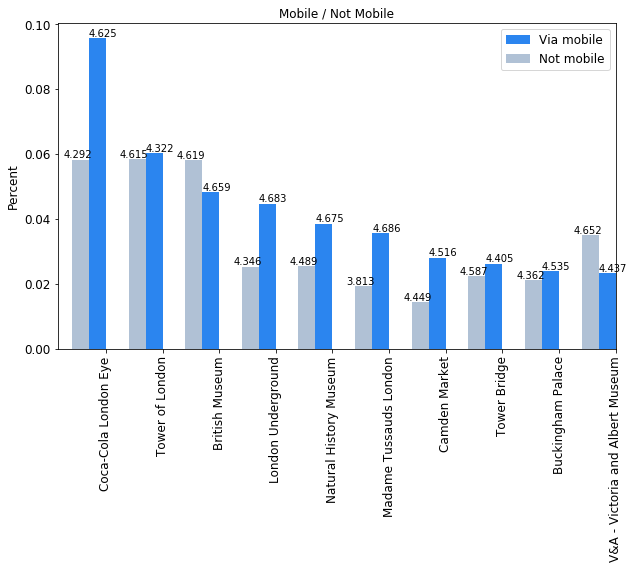

In [8]:
# Top destinations for not mobile
nom = df.loc[df.viamobile == 'no']
topn = nom.attraction.value_counts()[:20]/nom.shape[0]
# Top destinations for mobile
viam = df.loc[df.viamobile == 'via mobile ']
topvn = viam.attraction.value_counts()[:10]/viam.shape[0]

# Mean rating given by each group
nr = nom.groupby(['attraction'])['rating'].mean()
vr = viam.groupby(['attraction'])['rating'].mean()


via = pd.DataFrame(topvn).join(vr)
nvia = pd.DataFrame(topn).join(nr)
plt.figure(figsize=(10,6))
ax1 = via.attraction.plot(kind='bar',color='#2B85EF',width=.3,position=1,fontsize=12)
for i,p in enumerate(ax1.patches):
    ax1.annotate(str(round(nvia.rating[i],3)),(p.get_x(), p.get_height()+0.0005), color='k')
    
ax2 = nvia.reindex(via.index).attraction.plot(kind='bar',color='#B0C1D5',width=.3,position=2)
for i,p in enumerate(ax2.patches[10:]):
    ax2.annotate(str(round(via.rating[i],3)),(p.get_x()-.152, p.get_height()+0.0005), color='k')
    
plt.legend(['Via mobile','Not mobile'],fontsize=12)
plt.ylabel('Percent',fontsize=12)
plt.title('Mobile / Not Mobile')

# Attractions

## Bayesian Average Rating

In [6]:
#============================================================================================================
# Average rating for each attraction
#============================================================================================================
avr = df.groupby('attraction')['rating'].mean()
# avr.to_pickle('mean_rating.pkl')

df_all.loc[df_all.review_num == 'missing', 'review_num'] = '0'

# Number of reviews
df_all['rn'] = df_all.review_num.apply(getnum)
df_r = df_all.loc[:,['rn']]
df_r = df_r.join(pd.DataFrame(avr)).fillna(0)
rall = df_r.rn.sum()
# Prior mean
rave = df_r.rating.mean()

def BayesianRate(x):
    m=1700
    return x['rn']/(m+x['rn'])*x['rating'] + m/(m+x['rn'])*rave
brate = df_r.apply(BayesianRate,1).sort_values(ascending=False)
df_all['rating'] = brate
brate.head(10)

National Gallery                    4.629708
British Museum                      4.626879
V&A - Victoria and Albert Museum    4.625109
Churchill War Rooms                 4.605158
Tower of London                     4.597168
Houses of Parliament                4.596740
St. James's Park                    4.581611
Westminster Abbey                   4.547020
Borough Market                      4.539046
Hyde Park                           4.523043
dtype: float64

## Locality

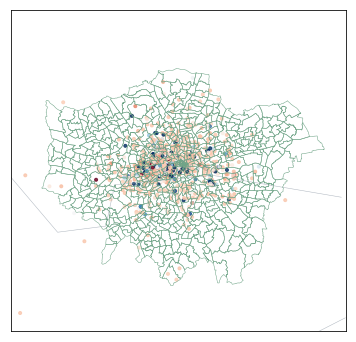

In [13]:
# Latitude and longitude
latlon = pd.read_csv('latlon.csv',sep='\t')
df_latlon = latlon.drop('num',1).set_index('attraction')
df_latlon['rating'] = brate
# df_latlon.to_picle('latlon.pkl')

from mpl_toolkits.basemap import Basemap
df_latlon = df_latlon.sample(frac=1)
plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=-0.6,llcrnrlat=51.2,urcrnrlon=0.4,urcrnrlat=51.8,
            projection='tmerc',lat_0=50.,lon_0=0,
            resolution ='l',)

m.drawrivers(color='#AEB6BF')
m.readshapefile('C:\Users\Administrator\Documents\London_Ward\London_Ward', 'London_Ward',color='#6FA487')
x, y = m(df_latlon.longitude.values, df_latlon.latitude.values)
m.scatter(x, y, c=df_latlon.rating.values, marker = '.' ,cmap='RdBu',vmin=3.78,vmax=3.9,alpha=.8)
plt.show()

## Neighborhood

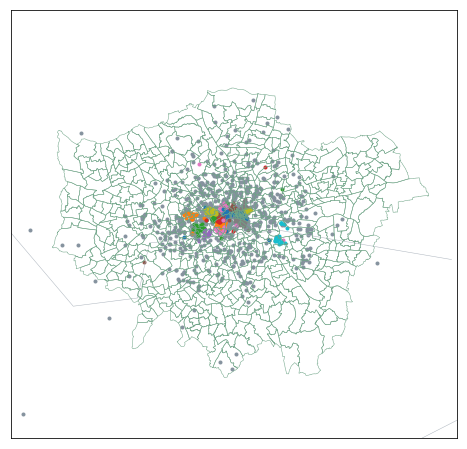

In [29]:
df_latlon = pd.read_pickle('latlon.pkl')
plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=-0.6,llcrnrlat=51.2,urcrnrlon=0.4,urcrnrlat=51.8,
            projection='tmerc',lat_0=50.,lon_0=0,
            resolution ='l',)

m.drawrivers(color='#AEB6BF')
m.readshapefile('C:\Users\Administrator\Documents\London_Ward\London_Ward', 'London_Ward',color='#6FA487')
df_n = df_latlon.loc[df_all.neighborhood == df_all.neighborhood.value_counts().index[0]]
x, y = m(df_n.longitude.values, df_n.latitude.values)
m.scatter(x, y, marker = '.', color='#85929E')
for i in range(1,20):
    df_n = df_latlon.loc[df_all.neighborhood == df_all.neighborhood.value_counts().index[i]]
    x, y = m(df_n.longitude.values, df_n.latitude.values)
    m.scatter(x, y, marker = '.')
plt.show()

## Suggested Duration

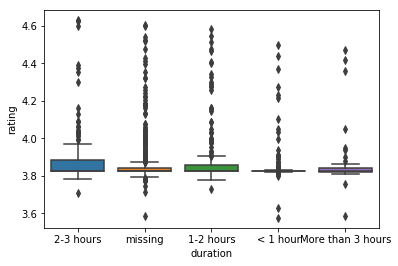

In [60]:
df_dur = pd.DataFrame(brate,columns=['rating'])
df_dur = df_dur.join(df_all.duration.apply(lambda x: x.replace('Suggested Duration: ',''))) 
sns.boxplot(x='duration',y='rating',data=df_dur.loc[:,['duration', 'rating']])

In [61]:
#============================================================================================================
# Compute the Mann-Whitney rank test
#============================================================================================================
from scipy.stats import mannwhitneyu
mannwhitneyu(df_dur.loc[df_dur.duration == '2-3 hours'].rating.values,
             df_dur.loc[df_dur.duration == 'More than 3 hours'].rating.values,alternative='greater').pvalue

0.0110319814983769

# Preprocessing

In [14]:
df.loc[df.memberID == '']

,num,userID,memberID,UID,attraction,user_rating,user_location,user_contributions,user_upvotes,viamobile,review_quote,review_content,review_link,rating,loca,country
52,52,Robert M,,UID_C0313B60EF153BE508CE0010F1D643DF-SRC_58346...,National Gallery,50,United Kingdom,1,0,no,Truly a world-class gallery!,The National Gallery is one of my favourite pl...,/ShowUserReviews-g186338-d188862-r583466723-Na...,5,United Kingdom,UK
122,121,Amanda A,,UID_A53D5C0431955354CA2B796E711644D2-SRC_58153...,National Gallery,40,missing,73,14,no,Bunch of Beautiful Portraits,My husband and I could not stay long enough to...,/ShowUserReviews-g186338-d188862-r581533295-Na...,4,missing,missing
152,152,Kuroshitsuji I,,UID_6550339CF0F0EB7C87AB6D9E7B311E21-SRC_58078...,National Gallery,50,missing,8,2,via mobile,Outstanding,It was amazing. Lots of things to see. Tons of...,/ShowUserReviews-g186338-d188862-r580788964-Na...,5,missing,missing
221,221,zuzana s,,UID_AA7DB384EC40946FE67067E6DA6ABC72-SRC_57836...,National Gallery,50,missing,3,0,via mobile,Beautifull gallery,"It's very nice gallery, with many paintings fr...",/ShowUserReviews-g186338-d188862-r578362822-Na...,5,missing,missing
315,313,Monica C,,UID_CD3D01285FF7F81EF2CB0213E8B31373-SRC_57586...,National Gallery,50,missing,10,6,no,One of my favourite ever!,Travelling to London during the last three yea...,/ShowUserReviews-g186338-d188862-r575868312-Na...,5,missing,missing
399,396,Belinda M,,UID_A4CBA005AB7482F284401211D70156BE-SRC_57378...,National Gallery,50,"Broken Hill, Australia",7,0,via mobile,Impressive collection,The building strengthens our appreciation of h...,/ShowUserReviews-g186338-d188862-r573789482-Na...,5,Australia,australia
402,399,A TripAdvisor Member,,missing,National Gallery,40,missing,3,2,via mobile,Great,"Always worth a visit!!!\nIf in London, you can...",/ShowUserReviews-g186338-d188862-r573773285-Na...,4,missing,missing
407,404,Rita C,,UID_52CA8F962D447F84CFA4EA58BBEF49D2-SRC_57366...,National Gallery,50,missing,8,3,via mobile,Mrs,Me and my husband have been members for two ye...,/ShowUserReviews-g186338-d188862-r573664920-Na...,5,missing,missing
417,414,A TripAdvisor Member,,missing,National Gallery,40,missing,20,2,via mobile,Amazing,I quite literally spent all day in here and di...,/ShowUserReviews-g186338-d188862-r573512784-Na...,4,missing,missing
561,591,Ana M,,UID_8FF45178C7184221D45EF0110B9949BA-SRC_56922...,National Gallery,50,missing,6,1,no,Amzing,Absolutely must-see for every tourists! Fabulo...,/ShowUserReviews-g186338-d188862-r569226915-Na...,5,missing,missing


In [34]:
df.loc[df.memberID == '','memberID'] = df.loc[df.memberID == '', 'UID'].apply(lambda s: s[s.find('_')+1:s.find('-')])

In [35]:
df.memberID.value_counts().head()

missin                              1264
3390F6D97F9998D3A6D5ACBEB063D397     469
EAA1EE36607B6A258F4A41A7387938A8     410
34D8E5A37F73FD21E6040F206411FE54     383
A7CFF3863F4D6F943B92922857D71524     375
Name: memberID, dtype: int64

In [17]:
df_u = df.loc[df.memberID != 'missin', ['memberID', 'attraction', 'rating']]
review_counts = df_u.memberID.value_counts()
review_counts.describe()

count    280417.000000
mean          2.273404
std           3.796996
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         469.000000
Name: memberID, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
le_attraction = LabelEncoder()
le=LabelEncoder()
tr = pd.DataFrame()

In [18]:
tr['memberID'] = le.fit_transform(df_u.memberID)
# Encode attractions
le_attraction.fit(df_all.index)
tr['attraction'] = le_attraction.transform(df_u.attraction)
tr['rating'] = df_u.rating.values
tr = tr.sample(frac=1,random_state=42)

In [156]:
data = Dataset.load_from_df(tr, Reader(rating_scale=(1, 5)))
data.build_full_trainset().global_mean

4.411986804726581

In [134]:
#============================================================================================================
# A simple model predict the attraction's mean rating for every user
#============================================================================================================
from surprise import AlgoBase
class mrate(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)

    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
            
        # attraction mean
        self.at_r = {}
        for i in self.trainset.all_items():
            imean = np.mean([x for _,x in self.trainset.ir[i]])
            self.at_r.update({i:imean})
        return self

    def estimate(self, u, i):
        if self.trainset.knows_item(i):
            return self.at_r[i]
        else:
            return self.trainset.global_mean

In [157]:
%%time
algo = mrate()
cross_validate(algo, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm mrate on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6493  0.6493  0.6496  0.6511  0.6473  0.6493  0.0012  
RMSE (testset)    0.8376  0.8383  0.8382  0.8412  0.8353  0.8381  0.0019  
Fit time          0.17    0.36    0.35    0.35    0.35    0.32    0.07    
Test time         1.13    1.10    0.90    0.84    1.44    1.08    0.21    
Wall time: 17.6 s


In [158]:
%%time
#============================================================================================================
# Singular value decomposition
#============================================================================================================
cross_validate(SVD(), data, cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6294  0.6284  0.6327  0.6309  0.6317  0.6306  0.0015  
RMSE (testset)    0.8280  0.8281  0.8346  0.8319  0.8319  0.8309  0.0025  
Fit time          25.18   27.40   25.00   24.83   24.73   25.43   1.00    
Test time         1.17    1.46    1.12    1.10    1.22    1.21    0.13    
Wall time: 1min 45s


{u'fit_time': (25.180000066757202,
  27.40400004386902,
  24.997999906539917,
  24.82800006866455,
  24.725000143051147),
 u'test_mae': array([0.629431  , 0.62839557, 0.63265268, 0.6308628 , 0.63171308]),
 u'test_rmse': array([0.82802795, 0.82807541, 0.83463766, 0.83189157, 0.83191343]),
 u'test_time': (1.1670000553131104,
  1.4609999656677246,
  1.11899995803833,
  1.0969998836517334,
  1.2200000286102295)}

In [48]:
u2 = review_counts.loc[review_counts > 9].index
df_u2 = df_u.loc[df_u.memberID.apply(lambda x: x in u2)]

In [40]:
df_u2.shape

(109428, 3)

In [49]:
tr = pd.DataFrame([])
tr['memberID'] = le.fit_transform(df_u2.memberID)
tr['attraction'] = le_attraction.transform(df_u2.attraction)
tr['rating'] = df_u2.rating.values
tr = tr.sample(frac=1,random_state=42)
#============================================================================================================
# Split the dataset into trainset and testset
#============================================================================================================
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(tr, test_size=0.2, random_state=42)
data = Dataset.load_from_df(tr, Reader(rating_scale=(1, 5)))

In [157]:
%%time
#============================================================================================================
# Singular value decomposition
#============================================================================================================
cross_validate(SVD(), data, cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.5364  0.5376  0.5421  0.5422  0.5409  0.5398  0.0024  
RMSE (testset)    0.7061  0.7061  0.7134  0.7158  0.7126  0.7108  0.0040  
Fit time          4.42    4.13    4.09    4.10    4.03    4.15    0.14    
Test time         0.31    0.17    0.16    0.15    0.14    0.19    0.06    
Wall time: 13.6 s


{u'fit_time': (4.421999931335449,
  4.133000135421753,
  4.088000059127808,
  4.099999904632568,
  4.031999826431274),
 u'test_mae': array([0.53641115, 0.53756657, 0.54211458, 0.5422287 , 0.54090279]),
 u'test_rmse': array([0.70606862, 0.7061358 , 0.71341216, 0.71582888, 0.71263637]),
 u'test_time': (0.30699992179870605,
  0.17499995231628418,
  0.16300010681152344,
  0.14899992942810059,
  0.1380000114440918)}

In [187]:
%%time
#============================================================================================================
# Singular value decomposition
#============================================================================================================
cross_validate(SVD(), data, cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.5346  0.5420  0.5413  0.5399  0.5356  0.5387  0.0030  
RMSE (testset)    0.7061  0.7122  0.7143  0.7055  0.7066  0.7090  0.0036  
Fit time          4.12    4.07    4.23    4.12    4.06    4.12    0.06    
Test time         0.16    0.18    0.16    0.15    0.16    0.16    0.01    
Wall time: 13.8 s


{u'fit_time': (4.119999885559082,
  4.065999984741211,
  4.228000164031982,
  4.118000030517578,
  4.062000036239624),
 u'test_mae': array([0.5345834 , 0.54202081, 0.54131846, 0.53992327, 0.53557885]),
 u'test_rmse': array([0.70612071, 0.71220725, 0.71434012, 0.70553022, 0.70658446]),
 u'test_time': (0.16100001335144043,
  0.17800021171569824,
  0.15999984741210938,
  0.1549999713897705,
  0.15699982643127441)}

In [46]:
#============================================================================================================
# Item-item collaborative filtering with rating normalization
#============================================================================================================
from surprise import KNNWithMeans
sim_options = {'name': 'cosine',
               'user_based': False,
               'min_support':3
               }
algo = KNNWithMeans(k=5, min_k=3, sim_options=sim_options)
cross_validate(algo, data, cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.5345  0.5338  0.5316  0.5308  0.5304  0.5322  0.0016  
RMSE (testset)    0.7339  0.7370  0.7339  0.7324  0.7305  0.7336  0.0021  
Fit time          0.54    0.54    0.53    0.54    0.55    0.54    0.01    
Test time         0.65    0.65    0.66    0.71    0.63    0.66    0.03    


{u'fit_time': (0.5360000133514404,
  0.5360000133514404,
  0.5299999713897705,
  0.5379998683929443,
  0.5520000457763672),
 u'test_mae': array([0.53446413, 0.53383296, 0.53156925, 0.53083461, 0.53042848]),
 u'test_rmse': array([0.73393825, 0.7370175 , 0.73391754, 0.73240122, 0.73051902]),
 u'test_time': (0.6549999713897705,
  0.6520001888275146,
  0.6630001068115234,
  0.7100000381469727,
  0.6310000419616699)}

# Content based modeling

## Feature engineering and data imputation

### Tags

In [7]:
df_notag = df_all.loc[(df_all.tags == 'missing')&(df_all.rn>20)]

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english',ngram_range=(2,2))
df_r = pd.read_pickle('review_body.pkl')
for attraction in df_notag.index:
    dfr = df_r.loc[df_r.attraction == attraction]
    try:
        t = tv.fit_transform(dfr.review_body).toarray()
        terms = pd.DataFrame({'term': tv.get_feature_names(), 'tfidf': t.sum(0)})
        tags = '; '.join(terms.sort_values('tfidf',ascending=False).reset_index(drop=True)[:5].term.values)
        df_all.loc[attraction,'tags'] = tags
    except:
        continue

In [9]:
#============================================================================================================
# One hot encoding for tags
#============================================================================================================
ltag = df_all.tags.apply(lambda x: x.split('; '))

lt = [] # list of all tags
for l in ltag:
    lt = lt + l
    
vtag = pd.Series(lt).value_counts() # value counts for tags
df_tag = pd.DataFrame(0,index=df_all.index,columns=vtag[(vtag>1)].index)
df_tag['tags'] = ltag

def hashtag(s):
    for x in s['tags']:
        if x in df_tag.columns:
            s[x] = 1
    return s

df_tag = df_tag.apply(hashtag,1)
feature_tag = df_tag.drop(['missing','tags'],1).add_prefix('tag_')

In [10]:
feature_tag.head()

,tag_worth a visit,tag_west end,tag_on display,tag_century,tag_sunny day,tag_london eye,tag_box office,tag_stage,tag_stroll,tag_tube station,...,tag_during intermission,tag_millennium dome,tag_magnate,tag_high street shops,tag_pennington,tag_hard hat,tag_lions,tag_small donation,tag_da vinci,tag_trenches
National Gallery,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
British Museum,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V&A - Victoria and Albert Museum,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Churchill War Rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
St. James's Park,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Neighborhood

In [13]:
df_ne = df_latlon.join(df_all.neighborhood).drop('rating',1)
ne_tr = df_ne.loc[df_ne.neighborhood != 'missing']
ne_te = df_ne.loc[df_ne.neighborhood == 'missing']

In [19]:
#============================================================================================================
# Build trainset and drop wildpoints
#============================================================================================================
def wildpoints(x):
    x0, y0 = np.mean(x[:,0]), np.mean(x[:,1])
    d = ((x[:,0] - x0)**2 + ((x[:,1] - y0))**2)**.5
    return abs(d - np.mean(d)) < 2 * np.std(d)
xtr = ne_tr.drop('neighborhood',1).values
ytr = le.fit_transform(ne_tr.neighborhood)
i=wildpoints(xtr)
xtr = xtr[i]
ytr = ytr[i]
i=wildpoints(xtr)
xtr = xtr[i]
ytr = ytr[i]
x_min, x_max = xtr[:, 0].min() - 0.025, xtr[:, 0].max() + 0.025
y_min, y_max = xtr[:, 1].min() - 0.025, xtr[:, 1].max() + 0.025
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

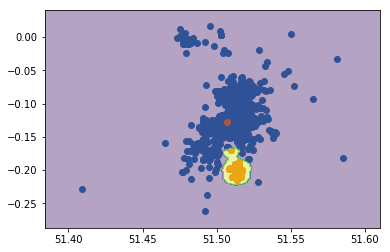

In [20]:
#============================================================================================================
# Suppor vector machine
#============================================================================================================
from sklearn.svm import SVC
svc_params = {
    'kernel': 'rbf',
    'probability': True,
    'gamma': 10000,
    'C': 10000,
    'random_state': 42
}
svc = SVC(**svc_params)
svc.fit(xtr,ytr==21)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr = plt.figure()
plt.scatter(xtr[:,0],xtr[:,1])
plt.scatter(xtr[ytr==21][:,0],xtr[ytr==21][:,1])
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

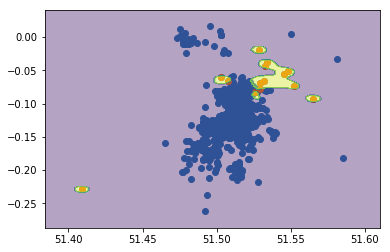

In [21]:
svc.fit(xtr,ytr==10)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr = plt.figure()
plt.scatter(xtr[:,0],xtr[:,1])
plt.scatter(xtr[ytr==10][:,0],xtr[ytr==10][:,1])
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

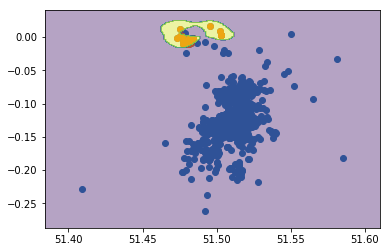

In [22]:
svc.fit(xtr,ytr==13)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axarr = plt.figure()
plt.scatter(xtr[:,0],xtr[:,1])
plt.scatter(xtr[ytr==13][:,0],xtr[ytr==13][:,1])
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

In [25]:
nvs = ne_tr.neighborhood.value_counts()
ni = nvs.loc[nvs>5].index.values
xte = ne_te.drop('neighborhood',1).values

In [26]:
%%time
for i in ni:
    ne = le.transform([i])[0]
    svc.fit(xtr,ytr==ne)
    ne_te.loc[svc.predict(xte),'neighborhood'] = i

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Wall time: 2.74 s


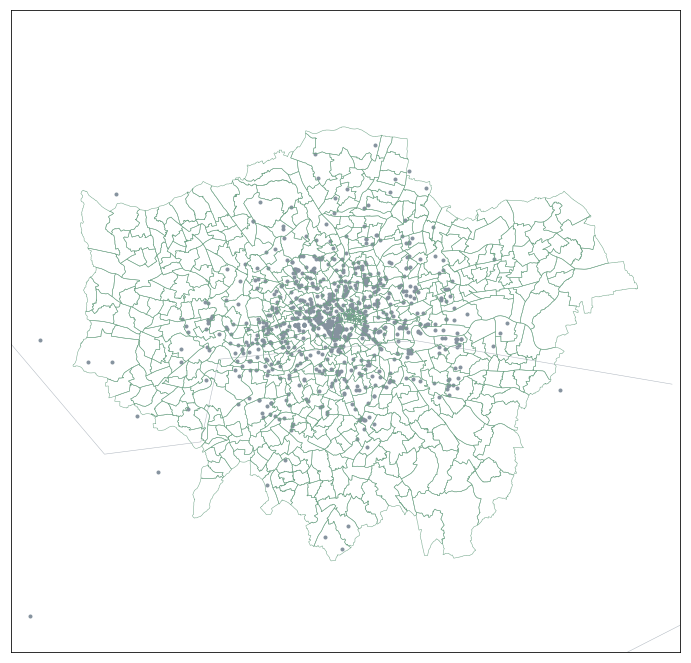

In [96]:
plt.figure(figsize=(12,12))
m = Basemap(llcrnrlon=-0.6,llcrnrlat=51.2,urcrnrlon=0.4,urcrnrlat=51.8,
            projection='tmerc',lat_0=50.,lon_0=0,
            resolution ='l',)

m.drawrivers(color='#AEB6BF')
m.readshapefile('C:\Users\Administrator\Documents\London_Ward\London_Ward', 'London_Ward',color='#6FA487')
df_n = ne_te
x, y = m(ne_te.longitude.values, ne_te.latitude.values)
m.scatter(x, y, marker = '.', color='#85929E')
plt.show()

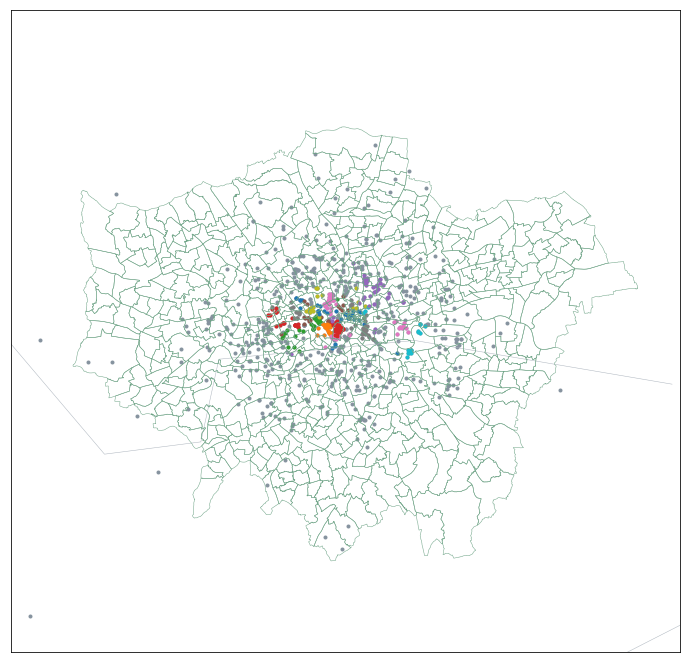

In [29]:
plt.figure(figsize=(12,12))
m = Basemap(llcrnrlon=-0.6,llcrnrlat=51.2,urcrnrlon=0.4,urcrnrlat=51.8,
            projection='tmerc',lat_0=50.,lon_0=0,
            resolution ='l',)

m.drawrivers(color='#AEB6BF')
m.readshapefile('C:\Users\Administrator\Documents\London_Ward\London_Ward', 'London_Ward',color='#6FA487')
df_n = ne_te
x, y = m(ne_te.longitude.values, ne_te.latitude.values)
m.scatter(x, y, marker = '.', color='#85929E')
for i in range(36):
    df_n = ne_te.loc[ne_te.neighborhood == nvs.index[i]]
    x, y = m(df_n.longitude.values, df_n.latitude.values)
    m.scatter(x, y, marker = '.')    
plt.show()

In [30]:
df_ne.update(ne_te)

In [31]:
feature_nei = pd.get_dummies(df_ne.neighborhood,prefix='nei_')
feature_nei.head()

,nei__Belgravia,nei__Bloomsbury,nei__Camden,nei__Chelsea,nei__Chiswick,nei__City of London,nei__Clapham / Battersea,nei__Clerkenwell,nei__Covent Garden,nei__Docklands / Canary Wharf / Isle of Dogs,...,nei__South Kensington,nei__Southbank,nei__Southwark,nei__Spitalfields,nei__St. James's,nei__Trafalgar Square / Embankment,nei__Victoria,nei__Westminster,nei__Whitechapel,nei__missing
National Gallery,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
British Museum,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V&A - Victoria and Albert Museum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Churchill War Rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
St. James's Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Attraction Category

In [32]:
# Split each sub-category
catlist = df_all.category.apply(lambda x: x.split(','))
cat=[]
for l in catlist:
    cat = cat + l
cat = map(lambda s: 'cat_' + s.lstrip().lower(), cat)
b = pd.DataFrame(0,index=df_all.index,columns=np.unique(cat))
c = pd.concat([catlist,b],1)

def onehot(s):
    for x in s['category']:
        cname = 'cat_' + x.lstrip().lower()
        s[cname] = 1
    return s

feature_cat = c.apply(onehot,1).drop('category',1)
df_cat = pd.DataFrame(brate,columns=['rating']).join(feature_cat)
df_cat.head()

,rating,cat_airport lounges,cat_ancient ruins,cat_antique stores,cat_architectural buildings,cat_arenas & stadiums,cat_art galleries,cat_art museums,cat_ballets,cat_biking trails,...,cat_theaters,cat_theme parks,cat_tramways,cat_transportation,cat_traveler resources,cat_universities & schools,cat_visitor centers,cat_water & amusement parks,cat_wineries & vineyards,cat_zoos & aquariums
National Gallery,4.629708,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
British Museum,4.626879,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
V&A - Victoria and Albert Museum,4.625109,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Churchill War Rooms,4.605158,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tower of London,4.597168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#===========================================================================================================
# Visualization with t-SNE dimension reduction
#===========================================================================================================
from sklearn.manifold import TSNE
ts = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
ff = feature_cat
tsf = ts.fit_transform(ff)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1718 samples in 0.007s...
[t-SNE] Computed neighbors for 1718 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1718
[t-SNE] Computed conditional probabilities for sample 1718 / 1718
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.797646
[t-SNE] Error after 500 iterations: 0.360230


In [35]:
import bokeh.plotting as bp
from bokeh.models import HoverTool
from bokeh.models import LinearColorMapper
from bokeh.plotting import figure, show, output_notebook

df_ts = pd.DataFrame(tsf, index=df_all.index,columns=['x', 'y'])
df_ts['attraction']=df_all.index
df_ts['category'] = df_all.category
df_ts['rating'] = df_cat.rating

color_mapper = LinearColorMapper(palette='RdYlBu6', low=3.8, high=3.9)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'rating', 'transform': color_mapper},source=df_ts)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Name':'@attraction'}
show(plot_ts)

Loading BokehJS ...

### Suggested Duration

In [36]:
df_dur = df_all.duration.apply(lambda x: x.replace('Suggested Duration: ',''))
df_ts['duration'] = le.fit_transform(df_dur)
df_ts['dur'] = df_dur

color_mapper = LinearColorMapper(palette=['#D476C1','#4684C6','#70E87A','#F78526','#C4C4C4'], low=0, high=4)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'duration', 'transform': color_mapper},source=df_ts)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Duration':'@dur'}
show(plot_ts)

Loading BokehJS ...

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

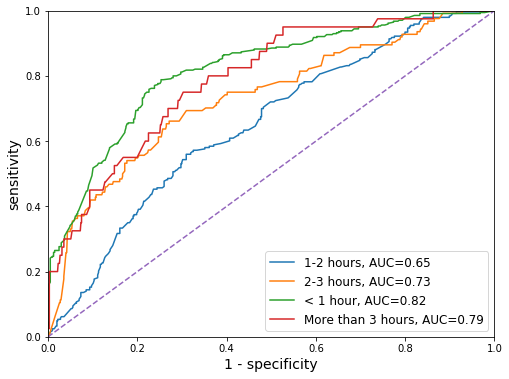

In [37]:
dur_tr = pd.DataFrame(df_dur.loc[df_dur != 'missing'], columns=['duration'])
dur_tr = dur_tr.join(feature_cat)
#==============================================================================================
# Random Forest Classifier
#==============================================================================================
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 20,
    'random_state': 42
}
rf = RandomForestClassifier(**rf_params)

xtr = dur_tr.drop('duration',1).values
le.fit(dur_tr['duration'])
ytr = le.transform(dur_tr['duration'])

yp = cross_val_predict(rf, xtr, ytr, cv=5, method='predict_proba')
plt.figure(figsize=(8,6))
yma = np.array([])
# ROC
for i in range(4):
    fpr, tpr, _ = roc_curve(ytr == i, yp[:,i])
    auc = roc_auc_score(ytr == i, yp[:,i])
    plt.plot(fpr, tpr, label='%s, AUC=%.2f'%(le.inverse_transform(i),auc))

plt.plot([0,1],[0,1],'--')
plt.axis([0,1,0,1])
plt.xlabel('1 - specificity',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)
plt.legend(loc='lower right',fontsize=12)

In [41]:
#===========================================================================================================
# Feature selection by information gain
#
#===========================================================================================================
from sklearn.feature_selection import mutual_info_classif
info_cat = pd.Series(mutual_info_classif(dur_tr.drop('duration',1), 
                                         dur_tr['duration'], 
                                         discrete_features=True), 
                     index=dur_tr.drop('duration',1).columns).sort_values()

info_cat[:10]

cat_music festivals                 4.440892e-16
cat_horse tracks                    4.440892e-16
cat_dams                            4.440892e-16
cat_missing                         4.440892e-16
cat_food & drink festivals          4.440892e-16
cat_sporting events                 4.440892e-16
cat_observatories & planetariums    4.440892e-16
cat_exhibitions                     4.440892e-16
cat_scenic drives                   4.440892e-16
cat_gardens                         3.117621e-04
dtype: float64

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

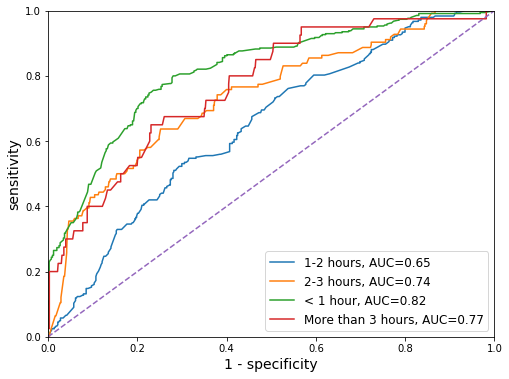

In [468]:
xtr = dur_tr.drop('duration',1)
xtr = xtr.drop(info_cat[:9].index,1).values
yp = cross_val_predict(rf, xtr, ytr, cv=5, method='predict_proba')

plt.figure(figsize=(8,6))
yma = np.array([])
# ROC
for i in range(4):
    fpr, tpr, _ = roc_curve(ytr == i, yp[:,i])
    auc = roc_auc_score(ytr == i, yp[:,i])
    plt.plot(fpr, tpr, label='%s, AUC=%.2f'%(le.inverse_transform(i),auc))
    # Micro average
    yma = np.append(yma,ytr==i)

plt.plot([0,1],[0,1],'--')
plt.axis([0,1,0,1])
plt.xlabel('1 - specificity',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)
plt.legend(loc='lower right',fontsize=12)

### Review Languages

In [38]:
# Remove parentheses
lang = df_all.languages.apply(lambda x: x.replace('Chinese (Sim.)','ChineseSim'))
lang = lang.apply(lambda x: x.replace('Chinese (Trad.)','ChineseTrad'))

# Number of reviews for each languages
b = lang.apply(lambda x: x.split('; '))
ll = []
for l in b:
    lll = map(lambda x: x.split(' ')[0],l)
    ll = ll + lll
    
df_lan = pd.DataFrame(0,index=df_all.index,columns=np.unique(ll)).drop('missing',1)
df_lan['language'] = b
df_lan['rn'] = df_all.rn

# Percentage of languages
def langnum(s):
    for x in s['language']:
        lname = x.split(' ')[0]
        try:
            s[lname] = float(getnum(x.split(' ')[1]))/s['rn']
        except:
            return s
    return s

df_lan = df_lan.apply(langnum,1)
feature_lan = df_lan.drop(['language','rn'],axis=1)
feature_lan.head()

,Arabic,ChineseSim,ChineseTrad,Czech,Danish,Dutch,English,Finnish,French,German,...,Polish,Portuguese,Russian,Serbian,Slovak,Spanish,Swedish,Thai,Turkish,Vietnamese
National Gallery,0.000214,0.004454,0.004301,0.000671,0.001464,0.006406,0.576414,0.000397,0.050210,0.012263,...,0.003691,0.065951,0.017083,0.000031,0.000092,0.082728,0.002623,0.000214,0.001617,0.0
British Museum,0.000395,0.007254,0.006842,0.000625,0.002105,0.007599,0.584065,0.000707,0.059180,0.011530,...,0.002895,0.054048,0.008536,0.000082,0.000115,0.121287,0.004326,0.000329,0.002418,0.0
V&A - Victoria and Albert Museum,0.000266,0.005007,0.005007,0.000152,0.001972,0.005955,0.775300,0.000531,0.029851,0.010165,...,0.001745,0.047603,0.011796,0.000000,0.000038,0.042672,0.003338,0.000266,0.001897,0.0
Churchill War Rooms,0.000277,0.005042,0.005042,0.000332,0.002770,0.004876,0.862699,0.000332,0.027981,0.007757,...,0.000388,0.026152,0.002604,0.000055,0.000000,0.027759,0.004820,0.000055,0.000277,0.0
St. James's Park,0.000653,0.007638,0.007638,0.001567,0.003852,0.010576,0.543413,0.000588,0.092440,0.021478,...,0.003786,0.069787,0.013252,0.000000,0.000326,0.086108,0.004766,0.000392,0.002154,0.0


In [39]:
#===========================================================================================================
# Visualization with t-SNE dimension reduction
#===========================================================================================================
ts = TSNE(n_components=2, verbose=1, random_state=42, perplexity=30, n_iter=500,learning_rate=400.0)
f1 = pd.concat([feature_cat,feature_lan],1)
tsf1 = ts.fit_transform(f1)

df_ts1 = df_ts.copy()
df_ts1.update(pd.DataFrame(tsf1,index=df_all.index,columns=['x','y']))
color_mapper = LinearColorMapper(palette=['#D476C1','#4684C6','#70E87A','#F78526','#C4C4C4'], low=0, high=4)
output_notebook()
plot_ts = bp.figure(plot_width=500, plot_height=400,
                       title="clustering of the categories",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)
plot_ts.scatter('x','y',color={'field': 'duration', 'transform': color_mapper},source=df_ts1)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Category':'@category','Duration':'@dur'}
show(plot_ts)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1718 samples in 0.011s...
[t-SNE] Computed neighbors for 1718 samples in 0.469s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1718
[t-SNE] Computed conditional probabilities for sample 1718 / 1718
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.242855
[t-SNE] Error after 500 iterations: 0.366744


Loading BokehJS ...

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

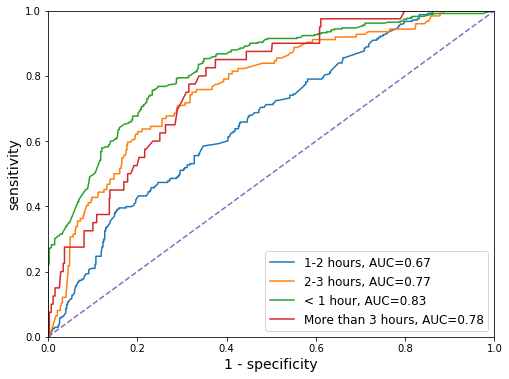

In [42]:
dur_lan = dur_tr.join(feature_lan)
info_lan = pd.Series(mutual_info_classif(pd.DataFrame(df_dur.loc[df_dur != 'missing'], columns=['duration']).join(feature_lan).drop('duration',1), 
                                         dur_lan['duration'], 
                                         discrete_features=True), 
                     index=feature_lan.columns).sort_values()


xtr = dur_lan.drop('duration',1)
xtr = xtr.drop(info_lan[21:].index,1).values
yp = cross_val_predict(rf, xtr, ytr, cv=5, method='predict_proba')

plt.figure(figsize=(8,6))
yma = np.array([])
# ROC
for i in range(4):
    fpr, tpr, _ = roc_curve(ytr == i, yp[:,i])
    auc = roc_auc_score(ytr == i, yp[:,i])
    plt.plot(fpr, tpr, label='%s, AUC=%.2f'%(le.inverse_transform(i),auc))
    # Micro average
    yma = np.append(yma,ytr==i)


plt.plot([0,1],[0,1],'--')
plt.axis([0,1,0,1])
plt.xlabel('1 - specificity',fontsize=14)
plt.ylabel('sensitivity',fontsize=14)
plt.legend(loc='lower right',fontsize=12)

In [43]:
dur_te = pd.DataFrame(df_dur.loc[df_dur == 'missing'], columns=['duration'])
dur_te = dur_te.join(feature_cat)
dur_te = dur_te.join(feature_lan)
xte = dur_te.drop('duration',1)
xte = xte.drop(info_lan[21:].index,1).values
rf.fit(xtr,ytr)
dur_te['prd'] = rf.predict(xte)
dur_te['duration'] = le.inverse_transform(dur_te['prd'])
df_dur.update(dur_te.duration)
feature_dur = pd.get_dummies(df_dur,prefix='dur_')
feature_dur.head()

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,dur__1-2 hours,dur__2-3 hours,dur__< 1 hour,dur__More than 3 hours
National Gallery,0,1,0,0
British Museum,0,1,0,0
V&A - Victoria and Albert Museum,0,1,0,0
Churchill War Rooms,1,0,0,0
St. James's Park,1,0,0,0


In [44]:
# Description TFIDF
tfidf = TfidfVectorizer(stop_words='english',min_df=.002,max_df=.1,ngram_range=(1,2))
tfidf.fit(df_all.description)
b = tfidf.transform(df_all.description)
feature_des = pd.DataFrame(b.toarray(), 
                           index=df_all.index, 
                           columns=map(lambda s: s.encode('utf-8'), tfidf.get_feature_names())).add_prefix('des_')
# all 
feature_all = pd.concat([feature_cat.drop(info_cat[:9].index,1),feature_tag,feature_nei,feature_lan.drop(info_lan[21:].index,1),feature_des,feature_dur],1)
# location
feature_all = feature_all.join(df_latlon.drop('rating',1))
# review number
feature_all['review_number'] = df_all.rn
# Bayesian rating
feature_all['rating'] = df_all.rating
# ranking
feature_all['ranking'] = df_all.ranking.apply(getnum)

# Cosine Similarity

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
cs = pd.DataFrame(cosine_similarity(feature_all,
                                    feature_all), 
                  index=df_all.index, 
                  columns=df_all.index)

for a in cs['Hyde Park'].sort_values(ascending=False)[:5].index.values:
    print a


Hyde Park
Churchill War Rooms
Westminster Abbey
St. James's Park
Covent Garden


In [51]:
cs = pd.DataFrame(cosine_similarity(feature_all,
                                    feature_all), 
                  index=le_attraction.transform(df_all.index), 
                  columns=le_attraction.transform(df_all.index))

In [50]:
#===========================================================================================================
# Predict a user's rating based on his given rating of top3 closest attraction
#===========================================================================================================
gm = data.build_full_trainset().global_mean
am = df_all.rating
am = am.apply(float)
am.index = le_attraction.transform(am.index)
attraction_mean = am
am=None
def cspredict(s):
    same_user = trainset.loc[trainset.memberID == s.memberID] # The same user in the trainset
    am = attraction_mean.loc[s.attraction]
    if same_user.shape[0] < 3:
        return am
    else:
        top3 = same_user.join(cs[s.attraction], on='attraction').sort_values(s.attraction,ascending=False) # Top 3 matches
        top3 = top3[:3]
        return (am+np.dot(top3['rating'].values,top3[s.attraction].values)/top3[s.attraction].sum())/2

In [603]:
%%time
testprd = testset.apply(cspredict,1)

Wall time: 1min 2s


In [618]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testset.rating,testprd)**.5

0.7425546789893525